In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [17]:
data = pd.read_csv("E:\Payoda\hepatitis.csv")

In [54]:
data.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            5
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [20]:
data.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [25]:
replacements = {'no': 0,
               'yes': 1,
               'die': 0,
               'live': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

data.replace(replacements, inplace = True)


In [26]:
data = data.astype(float)

In [55]:
data["steroid"].fillna(data["steroid"].mode()[0],inplace=True)
data["fatigue"].fillna(data["fatigue"].mode()[0],inplace=True)
data["malaise"].fillna(data["malaise"].mode()[0],inplace=True)
data["anorexia"].fillna(data["anorexia"].mode()[0],inplace=True)
data["liver_big"].fillna(data["liver_big"].mode()[0],inplace=True)
data["liver_firm"].fillna(data["liver_firm"].mode()[0],inplace=True)
data["spleen_palpable"].fillna(data["spleen_palpable"].mode()[0],inplace=True)
data["ascites"].fillna(data["ascites"].mode()[0],inplace=True)
data["varices"].fillna(data["varices"].mode()[0],inplace=True)
data["bilirubin"].fillna(data["bilirubin"].mode()[0],inplace=True)
data["sgot"].fillna(data["sgot"].mode()[0],inplace=True)
data["alk_phosphate"].fillna(data["alk_phosphate"].mode()[0],inplace=True)
data["albumin"].fillna(data["albumin"].mode()[0],inplace=True)
data["protime"].fillna(data["protime"].mode()[0],inplace=True)
data["spiders"].fillna(data["spiders"].mode()[0],inplace=True)

Text(0.5, 1.0, 'Age Distribution')

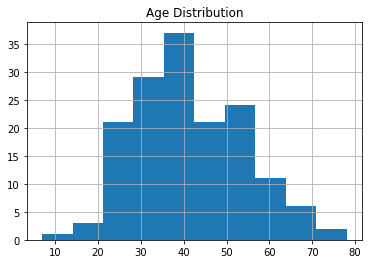

In [35]:
# print(df.age.value_counts())
data["age"].hist().plot(kind="bar")
plt.title("Age Distribution")

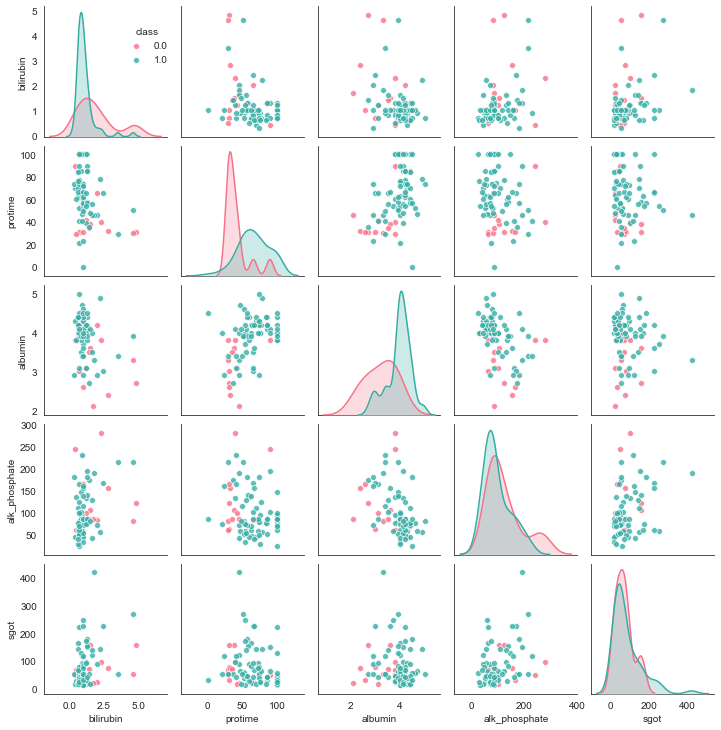

In [67]:
g = sns.pairplot(hepatitis_analysis, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

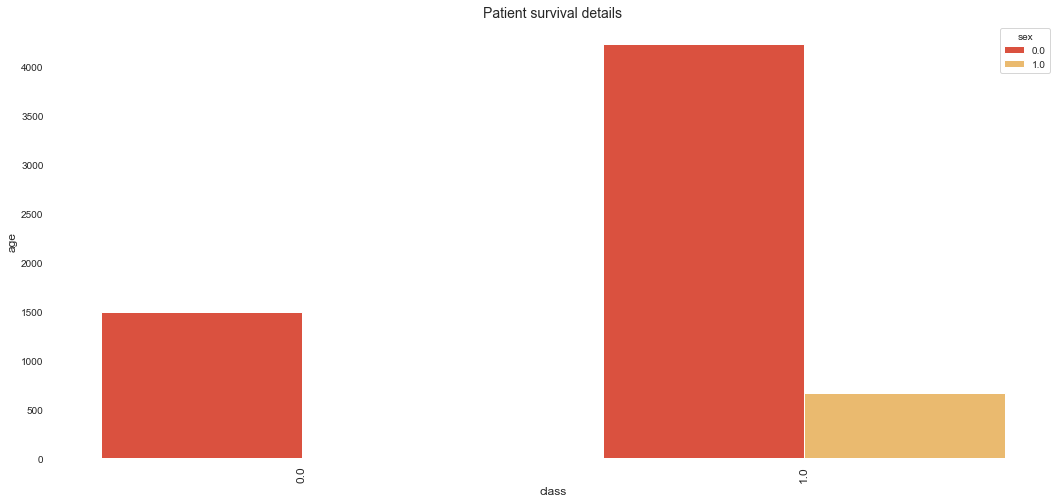

In [47]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Patient survival details',fontdict={'fontsize':14})

sns.barplot(x='class',y='age',data=data.groupby(['sex','class']).sum().sort_values(by='age', ascending=False).reset_index(),hue='sex',palette='YlOrRd_r')

plt.ylabel('age',fontdict={'fontsize':12})
plt.xlabel('class',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

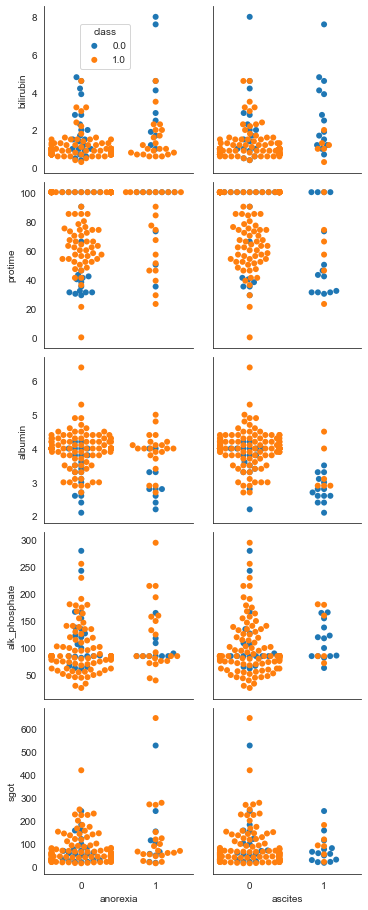

In [63]:
graph = sns.PairGrid(data,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

In [52]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable', 
'spiders','ascites','varices', 'histology']
data[categorical_variables].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


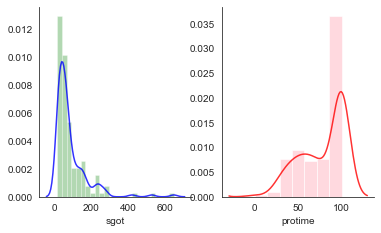

In [68]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(data['sgot'],
             kde_kws={"color":"blue","lw":1.data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAADpCAYAAADI+eewAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3de1zUVf748dfAMMpVUNQ0wQvqrmKmedu2ctMizXK7YCIaVrL7S6s1y7wRKpsoWq67mykVu7Yt6mpLfrvstrkplZWX8oKuqJSGmHcRcBhQBpj5/fFxRlBgYJiZzzDzfj4ePAb4zOfDOTq8OfP+nPM+GrPZbEYIIYRX8FG7AUIIIVxHgr4QQngRCfpCCOFFJOgLIYQXkaAvhBBeRIK+EEJ4EbcO+omJiWo3QQinkNe2UItbB/3i4mK1myCEU8hrW6jFrYO+EEIIx5KgL4QQXkSCvhBCeBEJ+kII4UUk6AshhBeRoC+EEF5Egr4QQngRrdoNcAX9FT16o77W90J0IYS0DlGpRUKIFqOyCqqqm3aO1hf83DO8umerHExv1LPvzL5a3xvYaaAEfSGEbVXV8NOZpp0T0cltg76kd4QQwotI0BdCCC8iQV8IIbyIeyadhHAyk8lESkoKeXl56HQ6UlNT6dq1q/V4dnY2q1atQqvVEhsby/jx46muriY5OZn8/Hx8fX1JS0sjMjKS3Nxcpk6dSrdu3QCIj49nzJgxKvVMiIZJ0BdeacuWLRiNRjZu3EhOTg5Lly4lPT0dgMrKStLS0sjKysLf35/4+HhGjBjB/v37AdiwYQO7du0iLS2N9PR0Dh06xFNPPcWUKVPU7JIQjSJBX3ilPXv2cNdddwEwYMAADh48aD127NgxIiMjadOmDQCDBg1i9+7d3H///dx9990AnD59mvDwcAAOHjxIfn4+W7dupWvXriQlJREUFOTaDgnRSJLTF17JYDDUCsy+vr5UVVVZjwUHB1uPBQYGYjAYANBqtcyZM4dFixYxatQoAPr378/s2bNZt24dERERrFq1yoU9EaJpJOgLrxQUFERZWZn1a5PJhFarrfNYWVlZrT8Cy5YtY/PmzcyfP5/y8nJiYmLo168fADExMRw6dMhFvRCi6WwGfZPJxIIFC4iLiyMhIYGCgoJax7Ozs4mNjSUuLo733nuv1rH9+/eTkJBg/frw4cNMnDiRhIQEEhMTKSwsdFA3hGia2267jW3btgGQk5ND7969rceioqIoKCigpKQEo9HI7t27GThwIB988AFvvfUWAP7+/mg0Gnx9fUlMTOTAgQMA7Nixg+joaNd3SIhGspnTt+eGV/v27cnIyOCjjz7C39/feq3Fixczf/58+vTpw4YNG8jIyGDevHnO650Q9YiJieGbb75hwoQJmM1mlixZwscff0x5eTlxcXHMnTuXxMREzGYzsbGxdOzYkfvuu4958+YxadIkqqqqSEpKolWrVqSkpLBo0SL8/PwIDw9n0aJFandPiHrZDPr23vCKjIxk5cqVzJ492/r8FStW0KFDBwCqq6tp1aqVQzsjRGP5+Pjwyiuv1PpeVFSU9fORI0cycuTIWscDAgL485//fMO1oqOj2bBhg3MaKoSD2Uzv2HvDa9SoUdYcqYUl4O/du5e1a9fy5JNPNrsDQgghGs/mSL85N7zq8sknn5Cens7bb79N27Zt7W23EEIIO9gc6dtzw6s+H374IWvXriUzM5OIiAgHNF8IIURT2Bzp23PDqy7V1dUsXryYTp068bvf/Q6AIUOGMH36dMf2SAghRL1sBn17bnhZdOnSxTqN09fXl2+//bY5bRVCCNFMsjhLCCG8iAR9IYTwIhL0hRDCi0jQF0IILyJBXwghvIgEfSGE8CIS9IUQwotI0BdCCC8iQV8IIbyIBH0hhPAiEvSFEMKL2Ky9I4QnMplMpKSkkJeXh06nIzU1la5du1qPZ2dns2rVKrRaLbGxsYwfP57q6mqSk5PJz8/H19eXtLQ0IiMjKSgoYO7cuWg0Gnr16sXChQvx8ZHxlHBP8soUXqnmNqAzZ85k6dKl1mOWbUDXrFlDZmYmGzdu5MKFC3z++ecAbNiwgenTp5OWlgZAWloaM2bMYP369ZjNZrZu3apKn4RoDAn6wis1dhtQnU5n3Qb03nvvte5/e/r0acLDwwHIzc1l6NChAAwfPpzt27e7uDdCNJ6kd4RXqm8bUK1W2+A2oFqtljlz5vDZZ5/x+uuvA2A2m9FoNNbnlpaWurAnQjSNjPSFV2rONqDLli1j8+bNzJ8/n/Ly8lr5+7KyMkJCQlzQAyHsI0FfeCV7tgH94IMPeOuttwDw9/dHo9Hg6+tL37592bVrFwDbtm1j8ODBru+QEI0k6R3hlezZBvS+++5j3rx5TJo0iaqqKpKSkmjVqhVz5sxh/vz5rFixgh49ejBq1Ci1uydEvTRms9msdiPq8+ijj7Jp06ZmX+ek/iT7zuyr9b2BnQbSJaRLs68thD0c9doWLnC5An4607RzIjqBfyvntKeZJL0jhBBexGbQN5lMLFiwgLi4OBISEigoKKh1PDs7m9jYWOLi4qyboFvs37+fhIQE69cFBQXEx8czceJEFi5ciMlkclA3hBBCNIbNoG/PIhaAjIwMkpOTqaiosD7fnRaxGKuNnNSfrPWhv6JXrT1CCOEKNoO+PYtYACIjI1m5cmWta7nTIpZyYzn7zuyr9aE3StAXQng2m0G/vkUslmP1LWIZNWqUdd6zhSxiEUIIddkM+s1ZxHLDD5NFLEIIoSqbQd+eRSz1kUUsQgihLpuLs+xZxFIfWcQihBDq8rrFWeUGLSuTb6VLx1aMemov4TddsT5PFmwJV5HFWS2ILM5q2fJywjj3UwD/2xfA5x9KgBdCeBevq73zw8FQWgdU0b9/Nd8fCFO7OUII4VJeN9L//kAoUdGXGDCknItnW3PxnHu+BRNCCGfwqqBfdL4VReda07t/Cf0GlgPIaF8I4VW8Kuif/SkQgIioUrpEVhIQXMmJo/WvKxBCCE/jVUG/6IKSymnboQKNBjrcfJkLp/1VbpUQQriOVwX94vOt8dWaCGpjBKBD53IJ+kIIr+JdQb+wFWHtK7BUg2jf+TKlJTqulPuq2zAhhHARr5qyWXS+NWHtr5V6bt/pMgDnT/sT2dOgVrOECkwmEykpKeTl5aHT6UhNTaVr167W49nZ2axatQqtVktsbCzjx4+nsrKSpKQkTp06hdFoZNq0adxzzz3k5uYydepUunXrBkB8fDxjxoxRqWdCNMyrgn7xhVb0ua3I+nWHm5Wgf+F0gAR9L1Nzn4icnByWLl1Keno6cG2fiKysLPz9/YmPj2fEiBFs27aN0NBQXnvtNYqLi3nkkUe45557OHToEE899RRTpkxRuVdC2OY1Qb/SqKG0RFdrpN+u42U0PmbJ63uhxu4TAVj3iRg9enStelG+vkpa8ODBg+Tn57N161a6du1KUlJSrXLkQrgTr8nplxS2BiAs/FrQ99OZCQuv4MIZCfrexp59IgIDAwkKCsJgMDB9+nRmzJgBQP/+/Zk9ezbr1q0jIiKCVatWubYzQjSB1wT94kJlumZY+yu1vh8aXsGlIp0aTRIqsnefiDNnzjB58mQeeughxo4dCyiVaPv162f9/NChQ67qhhBN5jVBX1+sBPY2bY21vh8aXkFJoZRi8Db27BNRWFjIlClTmDVrFuPGjbM+PzExkQMHDgCwY8cOoqOjXdsZIZrAa3L6ZXo/AILaVNb6fmi7CkqKWmEyqdEqoRZ79olITU1Fr9ezevVqVq9eDUBGRgYpKSksWrQIPz8/wsPDWbRokcq9E6J+3hP0S7VofMy0Dqiq9f3QdhWYqjQYLvnBzSo1Tricj48Pr7zySq3vRUVFWT8fOXIkI0eOrHU8OTmZ5OTkG64VHR3Nhg0bnNNQIRzMa9I7Br2OwOAqfK7rcejVG7slFyXFI4TwfF4T9Mv0WgJDKm/4fmg7JegXS15fCOEFvCboG/R+BAbXFfSVG7uXZKQvhPACXhP0y/R+N9zEBQgMqUTrZ5L0jhDCK9i8kWtPjZL6zjl8+DALFy7E19eXbt26sXjxYnyuT7I7iUHvR1Ad6R2NBtq0M8q0TSGEV7AZcWvWKJk5cyZLly61HrPUKFmzZg2ZmZls3LiRCxcu1HvOG2+8wbPPPss//vEPjEYjX3zxhdM6VpPJBOUGvzpz+gBt2lZY5/ELIYQnsxn0G1ujRKfTWWuU1HdOnz59KCkpwWw2U1ZWZl0B6Wz6SxowU+dIHyA41Ii+RIK+EMLz2Qz69tQoqe8cS0rn/vvv5+LFiwwbNsyRfamX/pLSzbpu5AIEh1ZiKPFzSVuEEEJNNoO+PTVK6jtn8eLFrFu3jk8//ZSHH364VqrImS6VKN2s60YuKCP9K+VajMY6DwshhMewGfTtqVFS3zlt2rSxvgPo0KEDer3e4R2qi82R/tU/BiXFXjOZSQjhpWwm1e2pUVLXOQCpqam88MILaLVa/Pz8XFajRH9JA1DvjVzLnrkS9IUQns5m0LenRkld5wAMHjxYlRolZWVKMPcPrKrzeEioEvSLLkrQF0J4Nq8ouFZm0KDxMaNrVXcpzSBJ7wghHMFkgqq6B5fuwiuiXHmZhtYB1Wg0dR8PDpX0jhCimbZ+BomTYWoi5P+odmvq5RVRzmDwwT+g/r++fjozrfyrKSnyin8OIYSjnT4FGW/CTZ2VZf4zZsCVK7bPU4FXRLmyMk29+XyL4DCjjPSFEPZ59x3w08HsefDCLCgshM2b1W5VnbwiypUblPROQ4LbGCmWkb4QoqmKi2HPdzD6fggLg+h+EBUFGzeC2ax2627gFVGurMznhh2zrhfUplJG+l7EZDKxYMEC4uLiSEhIoKCgoNbx7OxsYmNjiYuL47333gOUWlOzZs1i4sSJjBs3jq1btwJQUFBAfHw8EydOZOHChZhk703v8vU2MJlh+Ajla40GHnkEvv8ejh5Vt2118IooV2bQNJjTB2XapgR972FPIcGPPvqI0NBQ1q9fT0ZGhnWdSVpaGjNmzGD9+vWYzWbrHwPhJb76UhnZR0Rc+94ddyqPO3eq06YGeEWUKyvzoXVgw+mdoDaVlJb6UFn3+i3hYewpJDh69Gief/556/N8fX0ByM3NZejQoQAMHz6c7du3u7AnQlV6PRw7BkOvqyPWoQP06AE7dqjTrgZ4fNA3mZQpmzZv5F6dtllc7IpWCbXZU0gwMDCQoKAgDAYD06dPZ8aMGQCYzWY0V+cDBwYGUlpa6sKeCFUdPKDk7fsPuPHYL34BOTluN4vH44P+5cvK/4mtnH5IqDLEv3jRFa0SarOnkCDAmTNnmDx5Mg899BBjx44FqLURUFlZGSEhIa7ognAHB/ZDgD/07HXjsWHDwGiEAwdc364GeHzQtwy6/G3M3rHU35Gg7x3sKSRYWFjIlClTmDVrFuPGjbM+v2/fvuzatQuAbdu2MXjwYNd2Rqhnfw70uwWupvpqueUW5fHQIde2yQaPL8NgMCiPtkb6lvROUZGzWyTcgT2FBFNTU9Hr9axevZrVq1cDkJGRwZw5c5g/fz4rVqygR48ejBo1SuXeCZcoLoZz5+D+B+o+HhICXbpI0Hc1S9C3ndOX9I43saeQYHJyMsnJyTdcq3v37qxdu9Y5DRXu64c85bH3z+p/TnQ07NvnmvY0kheldxoO+rpWJvwDzDLSF0I0Tt4R0PpCj6j6nxMdDefPKyt03YTHB/1r6Z2Gc/oAoWEmGekLIRrn+zzo3gN0DeyvHR2tPLpRiseLgr7tcqehYSYZ6QshbDOZlNW2vXo3/LxeV2f1uNHKXK8J+rZy+gBhEvSFEI1x6hRUVNQ9VbOmgADo3FmCviuVloKfnxk/ne3CR5LeEUI0SkG+8titu+3n9uwpQd+VDAYIDGxcpbuwtiYuXXL7jW+EEGrL/1G5iXtzF9vP7dkTCgpwlxovXhH0A4IaF/RDw5TqiFKKQQjRoOP5EBEJfn62n9uzJ1RXw/HjTm9WY9gM+vaUoK3vnIsXLzJt2jQmTZrEhAkTOHHihBO6VJvBAEFBjSt1awn6ktcXQjToeL4yc6cxLOs/3CTFY3NxVs0StDk5OSxdupT09HTgWgnarKws/P39iY+PZ8SIEezbt6/Oc1577TXGjh3LmDFj2LlzJz/++CORkZFO7aDBAAFNSO+ABH0hRAOKi6G4BLp2a9zzIyLAx0dJ8bgBmyN9e0rQ1nfO3r17OXfuHE8++SQff/yxtRytMzUlp98mVIK+EMKG41dv4jZ2pK/TKTN4XJDZaAybQd+eErT1nXPq1ClCQkL429/+RqdOncjIyHBkX+ppPwQ2Mr1jGenLDB4hRL2sM3e6Nf6cyMiWk9O3pwRtfeeEhoZa65mMHDmy1rsGZ2lKesc/wIxOJyN9IUQD8n+E9u0hKNj2cy26dlVG+m6wZ67NoG9PCdr6zhk0aBBffvklAN999x09e/Z0eIdqqq6G8vLGp3c0GmjXToK+EKIB+fmNm59fU9euymYqFy44p01NYPNGrj0laOs6B2DOnDkkJyezYcMGgoKC+MMf/uDUzlnebAQ0Mr0D0LatpHeEEPUwVsDpU3D7HU07zzJhpaBA2UpRRTaDvj0laOs6B+Dmm2/mnXfesbetTWYpwdDYkT4oI/2zZ53UICFEy3biBJjMTR/pW/L/J07AkCEOb1ZTePTiLEvQD2rk4iyQkb4QogH5PyqPPRo5c8ciPBxat3aLaZseHfQttfQDApuW3ikuVoroCSFELcfzwb81tG9iisbHR0nxSNB3Lmt6p4kjfZMJLl1yUqOEW7BnpbnF/v37SUhIsH6dm5vLXXfdRUJCAgkJCXzyyScu6YNQgeUmro8dodMyg0dlHr1dYs2cvqGR57RtqzwWFUFYmFOaJdyAPSvN27dvT0ZGBh999BH+/v7Wax06dIinnnqKKVOmqNUd4QomkzJH/+6Rtp9bl8hI2LpVKbzWmJo9TuIVI/3GpneM1UaqWp3DWG3k0Ilz6K/ondg6oSZ7VpoDREZGsnLlylrXOnjwIF988QWTJk0iKSkJg6GxQwzRopw/B5evNH4l7vW6dlX+cJw65dh2NZFHB31LTr+x6Z1yYzmnqv7H5cpy9hzLR2+UoO+p7FlpDjBq1Cjr4kSL/v37M3v2bNatW0dERASrVq1yQQ+Ey+U3oYZ+Xbp2VR5VTvF4dNA3GKBVq6a9kwoJVWpeG0oa2PdStHj2rDSvT0xMDP369bN+fsiN9kMVDnQ8H3w01+bcN1VExNXrHHdYk+zh8UG/xmCuUfwDq/DRmim9pF7OTTifPSvN65OYmMiBAwcA2LFjB9GWzbCFZzmer2yaomtl3/khIcqNQpVH+h5/I7epQV+jgeA2RgwS9D2aPSvN65OSksKiRYvw8/MjPDycRYsWubAnwmXyf4Q+fZt3jYgI+Oknx7THTh4d9EtLoYF35fUKalNJqaR3PJo9K80tunTpUmsaZ3R0NBs2bHBOQ4V7MJRCYSF0tzOfbxERAd9955g22UnSO3UIbmOk9JIEfSHEVdabuHbO3LGIjITz55XiayqRoF8HZaQv6R0hxFU/HlMe7Z25Y2G5mXvyZPOu0wwS9OsQ3KYSwyU/dyh9LYRwB8eOKjX0Q0Obdx1L0FfxZq5HB317c/rBYUaqq3wwlGoc3yghRMtz7ChEOWD/DxnpO09lJRiN9o3024QZASi66LH/PEKIxtLr4cwZxwT9oCDVp216bFS7Vla56eeGtK0A4GKhrwNbJIRokfLylMdevRxzvYgICfrO0JygH9pOCfqFFzz2n0cI0VhHDiuPPaIafl5jRUZKescZLHV37Mnph1xN71yUoC+EOHIEbrqpaRuhNyQiQtVpmx4b1Zoz0vfTmQkMqaTwgqR3hPB6hw9DTwelduDazVyVVuZK0K9Hm7YVXCz02H8eIURjFBXBuXOOuYlr4e5B354dhmyd8/HHHxMXF+fAbtyo2UG/nVFG+kJ4u8NX8/mOHOlbqnS6a9CvucPQzJkzWbp0qfWYZYehNWvWkJmZycaNG7lw4UKD5xw+fJisrCzMTl755JCRvuT0hfBuublKFUZH3cQFCAxUtuhz16Bvzw5D9Z1TXFzM8uXLSUpKckZfaml+0Ddy6ZIPRqPj2iSEaGH274cePaDG9pgO0aWLatM2bQZ9e3YYqusco9HIyy+/TFJSEoGBgY7sQz3thoAA+/YvBggNV6ZtXrjgwEYJIVqOqio4cAAGDHD8tSMj3Xekb88OQ3Wdc+TIEQoKCkhJSeHFF1/k6NGjLF682JF9qcXeujsWYVeD/pkzDmqQEKJlycuDy5edE/QjIpQR5eXLjr+2DTaDvj07DNV1Tv/+/fn3v/9NZmYmK1asoGfPnrz88stO6pYyT785Qb9dR2UO7enTDmqQEKJl2btXebzVSUEfVFmkZXMTFXt2GKrrHFfT6+1bmGUR2q4CHx9VF84JJzKZTKSkpJCXl4dOpyM1NZWulo2rUWalrVq1Cq1WS2xsLOPHj7ce279/P8uXLyczMxOAgoIC5s6di0ajoVevXixcuBAfe/OKwn3s3q2kYdq1g3IHv+WvOYPHUeUdGslm0Ldnh6G6zqnp+p2HnKG0FBrY4c4mX62Z9h2rOXXKcW0S7qPmDLOcnByWLl1Keno6cG1WWlZWFv7+/sTHxzNixAjat29PRkYGH330Ef41buylpaUxY8YMhg0bxoIFC9i6dSsxMTFqdU04gtGoBP1HHnHO9VWcq++xwxF7yyrXdFMnCfqeyp5ZaQCRkZGsXLmy1rVyc3MZOnQoAMOHD2f79u0u6oVwmr17oaICfvlL51zfMm1ThRk8Hhv09Xpl8/nmuKlzteT0PZQ9s9IARo0aZZ3IYGE2m9FoNNbnlloKP4mWa/t20Ongttuc9zNU2iTdI4O+yQRlZQ4I+p2qKSqC8nLHtEu4D3tmpdWnZv6+rKyMkOa+8IS6zGb44gsYPBhat3bez5Gg7zjNqbBZ002dqgGZweOJ7JmVVp++ffuya9cuALZt28bgwYOd23jhXIcOKb/0993n3J8TGanKtE2bN3JbIr1eeWxu0O/cRQn6BQXQ04H1loT67JmVVp85c+Ywf/58VqxYQY8ePRg1apQLe+JhKqugqrrxz9f6gp+Dw9jmzeDnB3ff7djrXq9LF+Xx5EmXzuDxyKBvGek39112RNcqNBo4dgzuuaf57RLuw55ZaRbXzz7r3r07a9eudU5DvU1VNfzUhOmREZ0cG/SNRvj0U7jjjuYt9GkMlaZtSnqnAa1bK3+Mjx5tfpuEEC3Af/+rlFOusS7DaSzTNl08g8cjR/qW9I4j7qf17KmM9IUQbuDyZfghD374Ac6fA60P+PooC6g6dYL+/aFPHyU901QmE6xfrxRYGzLE8W2/nkrVNj0y6DtqpA8QFQVffqlM2W3VqvnXE0I0kdkMB3Jg6xb4dicYK5Xvh7ZRgr2vD1y8qEzZA+Ut+vDhMHYsDBvW+KqL//43fP89LFqklFN2BRVm8Hhk0Hf0SN9kguPH4Wc/a/71hBBNkHsQ1v4d8o4oOfZ7YmDIMOUXMyhYyen7Xx2NFRfDvn2waxd89pmSqrn5Zpg4UfkDEBBQ/88pLISVK6FfP3DljfiICNi503U/Dw8N+qWloNU6ZmRuub+SlydBXwiXMRjgnb/A59nKaH7qM3D3SGXBVH3CwmDkSOVj5kzlLfo//gGvvQZvvqmUVJgwATp0qH2eXg8vvaQsyHn5ZfvrsdujRw/4178cs5q0kTw26IeEOOYdWmQkhIYqA4hf/7r51xNC2JB7EP64HEqKYdx4GPcY6Jo4gtPpICZG+fjf/2DdOli7VnkcMUIprxAerryFX79eGemnpbm8+BmWGWM//uicEs518Mig39wKmzVpNDBw4LUqq0IIJzGbYdP78OqrcFMnmPuyY/amveUWWLpUWXD1j38oUzK3bLl2vG9f5Xi/fs3/WU1lCfrHjknQbw5Hv1MaOBA+/xzOn7/xnaEQogGNXWxlMsGf/wRZWTDgNpgxU5nd4kidOytpn+d+p6y4LC5RRvudOyvHL1fUfZ4z9/Pu2FG51+DCKYIeGfQvXYL27R13PUvNpd27YcwYx11XCI/XmMVW1dWweqWSv094HB4a59y8uskM+EFYe6jGdvtubkaNdls0GmW0L0G/eYqLoUYplWbr3VsZEGzZUnfQ11/RozfqrV+H6EIIaS1Ft4SwyWSCP6+Ar7+C+Enw7HNw+nzTrlHfCL0+zhy52yMqSkklmM0umSrqcUHfbIaSEuVGvqP4+MDo0Uo6sKREubFbk96oZ9+ZfdavB3YaKEFfCFvMZnhrtRLwJz8BD8c2PeiZTHDqXNPOcebI3R5RUfDBB8potW1bp/84jyvDcPmyUj7j+sDcXA88oLwL/eQTx15XCK+1PhM++y/EPqYEfG9luZnronovHhf0i4uVR0eO9EGZyXXbbbBmzbUVv0IIO2Vvgfez4L5RMPFxtVujLksJ3x9/dMmP87igX1SkPDo66IOyfkOvh2XLlHeVQgg7HDmkpHX63wq/neq6kgfuKixMSU246GauzaBvMplYsGABcXFxJCQkUFBQUOt4dnY2sbGxxMXFWcvN1nfO4cOHmThxIgkJCSQmJlJYWOjwDllG+s5IjfXuDVOnKtN8X3oJzjUxlSiE1yu6CK+mQXh7eGk2+Pqq3SL1aTTKylx3CfpbtmzBaDSyceNGZs6cydKlS63HKisrSUtLY82aNWRmZrJx40YuXLhQ7zmLFy9m/vz5ZGZmEhMTQ0ZGhsM7VFKiPDo6p28xZQq8+KJSLiM2Ft55R7mHIISwwWSCP62Ay1eUhVdBDlpB6Qks5XxdMLPI5uydPXv2cNdddwEwYMAADh48aD127NgxIiMjadOmDQCDBg1i9+7d5OTk1HnOihUr6HB1dVN1dTWtnFC20pE5fWO1kZP6k7W+p9VoGf5gFb0H+fCXVcH88fVW/PPDNjw+z4/g0Mrm/1AhPNX7/4SD/4PnpkNEpNqtcS9RUUqV0DNnri0WcxKbQd9gMBBUYwcZX19fqqqq0Gq1GAyGWhtGBwYGYjAY6j3HEvD37rxY5QwAABTlSURBVN3L2rVrWbdunSP7AihBv1Ur8Pdv/rXKjeXkluTW+l730O7kl+QD8MCz0P0XbdnwpwH8JS2a5xbtx0/nZnOARZ1MJhMpKSnk5eWh0+lITU2la9eu1uPZ2dmsWrUKrVZLbGws48ePr/ec3Nxcpk6dSrdu3QCIj49njKziq+1QLmxcD8N/BSNkG7ob9OmjPB45on7QDwoKosxSpxrll0Wr1dZ5rKysjODg4AbP+eSTT0hPT+ftt9+mrRMS78XFzrmJW5++g4p4bs55li4M44uPuxAT6/rd7UXT1UxB5uTksHTpUtLT04FracusrCz8/f2Jj49nxIgR7Nu3r85zDh06xFNPPcWUKVNU7pWbMpTCn/4AHW+Cp5+RG7d16dlTKQ186JBSJdSJbOb0b7vtNrZt2wZATk4OvWssdY2KiqKgoICSkhKMRiO7d+9m4MCB9Z7z4YcfsnbtWjIzM4mwbBXmYK4O+gDD7izjll8U8tk/Iym52EDpV+E2Gpu21Ol01rRlfeccPHiQL774gkmTJpGUlITBYHB9h9xZxptKxcwXZznmLbgn0umUeeGHDjn9R9kc6cfExPDNN98wYcIEzGYzS5Ys4eOPP6a8vJy4uDjmzp1LYmIiZrOZ2NhYOnbsWOc51dXVLF68mE6dOvG73/0OgCFDhjB9+nSHdsjRq3Eb69eTf+Tgt+348l83M0KFYn2iaRyZtuzfvz+PPfYY/fr1Iz09nVWrVjFnzhyX9sdtffkFfPUVxE+EqJ5qt8a99emjbPzi5HIMNoO+j48Pr7zySq3vRVlWkAEjR45k5HVvR+o6B+Dbb7+1t52NVliozH5ytXYdKxh4xwV2fNaJ0meugFRhcGuOTFvGxMQQcrWsa0xMDIsWLXJRL9xcSQksf035hXxknNqtcX99+8KmTcr2iZHOu9HtUYuzqquVoN9RpdIaIx46ifGyL1s2t1anAaLRHJm2TExM5MCBAwDs2LGD6OhoF/fGTb36KuhL4bnnlXy1aNgttyiPV19LzuJR/xOFhcpUYLWC/s3dy+jaW89/PgznuSm236FJdU71OCptCZCSksKiRYvw8/MjPDxcRvoA2dlKqmJKInTrrnZrWobu3ZWNQHJy4MEHnfZjPCroW1bI3nSTem24PeYsH759E3v3wqBBDT9XqnOqx5Fpy+joaDZs2OCchrZEJSXKTlQ//zkkTIYzF9RuUcvg4wO33qoEfWf+GKde3cXOnlUe1RrpAwy44wKBQWbef1+9NgihqldfVYpUpaRIWqepBgxQ9u21rDJ1Ao8K+paRvppBX9fKxD2jLpOd7dT/NyHc05YtSlrnt7+9Vj1SNN7AgcqjEzfl9rigHxAANWbVqeL+sZepqoKPP1a3HUK4VFERpKUps1CefFLt1rRMffsqQWznTqf9CI8L+mrm8y26dq9mwAD4v/+TEszCS5jNSsC/fFlJ60j1TPtotTB0KOzY4bTiax4V9M+eVTe1U9OjjyrTbXfvVrslQrjAp58q+7xOnarOQhlPcvvtSjC7roy9o3hU0D93Dq7WdFPdvfcq5Z3XrlW7JUI42dmzys3b/v3hcS/fBcsRbr9deby6JsTRPCbo6/VKSrFGoURV6XTK63/79vrLaVRWwjefduLNV/qR/vtb2LQxgPJy17ZTiGapqoKkJGVl5O9/r0w7FM3TubNSkmHLFqdc3mP+hyybzrjThIHx45W1FitW3JjbP3sWZk8P4/2MnlwqakWZXstfVgcRF+f0BXlCOM5bbykv2ORkcFIRRa8UE6OMFk+fdvilPS7o11hfo7qAAJg5U1lr8be/Xfv+9u0wcSKcOK5l8szDzPnTHl76wz6Wv1GMr6+SFnXSH3khHOfLL5Wt4x5+GO67T+3WeJZ771UeN292+KU9ZuXEsWMQGOgeOf2aO271vxN+8asQVq4K5MgRX3x8lIDeqxfMSC7ivPbaPsF9b6nk3XeV7RjnzlX+YDzwSO1SDSDlGoQbyMuDl19Wphi+9JLarfE8nTsrS/r/7//giSccmjbzqKAfFeUe+zNcv+NWzG+g40138tVnYZjNSq5/2jS4UFHN+TO1z23TBtLTlXfLf/gDlFRU0uX2fbWeI+UahKrOn4cXXlBerH/8I7SWAoNOERur3C/ZsQPuuMNhl/WI9I7ZDEePulc+vyYfH3jq6TI2b4bPPoMZM5QtHeuj08GSJXD33ZD+52B2fOYGiw+EAOVm1P/7f2AwKAG/XTu1W+S5RoyA8HB4912Hztn3iKB//Lgye+fnP1e7JQ1ryrsQrVYJ/EN+UcE/3+rFgZ3yyyVUdvKkUl6hpARWr4Ya5aiFE/j5wVNPKSUZvvvOYZf1iKC/fbvy+MtfqtsOR9PpYN7vL9G1l561f/o5+XnBtk8Swhm2bYOEBCgrU/KP/WR7OJd45BFlxemKFcocbwfwiKD/zTfKIkB3KMHgaK1bQ+K8XELbV/CXJf04f0r2GBUudOmSsvDqxRehSxfIzFTmkAvX0Olgzhwlf71mjUMu2eKDfmkp7NsHd96pdkucJyikiqeTD+Lra+bt1H4UF7X4/zbh7i5eVILMQw9BVhZMmABvvgVtw+FyReM/nFQ/xqsMHw4PPAAZGcrmNM3U4mfvrF2rvOsZPVrtljSs5jROiyuVVxr9nHYdr/CbpIOsXtifBbP9+ftfIdgJ2Z7rd/MC+6eIOmpnMEe2SdTBbFZGTydPKiOoXbuUKo8mk5Izff55ZWrc5Qr46Yzt69V0s5sUw2rpkpLgxAmYNw/mz2/Wzlo2g77JZCIlJYW8vDx0Oh2pqal0rVHrIDs7m1WrVqHVaomNjWX8+PH1nlNQUMDcuXPRaDT06tWLhQsX4tOM+acnTsD69cq6EHe/p3T9NE6A7qHdm/ScyJ4Gnph5mH/8YShPPqnc6P3Zz+xvk9ms3ATPyYEjR5QCcQajD+ZgAxFRpXT/uZ4ON5cz6ObGTxE9c0YpMrd7Nxw74UOxsZL2nS/TM/oSj4yMJDqy6YH6UoWeT3cfIW9fW04cDeZSkY4OwT707amUHx80CNq3b9o13fl17VAmk7KP6IULSnGq+h6NxmvndOkCkyfD2LHuU9fE27VqBStXKmsiUlKUhXHTptlV3M5m0N+yZQtGo5GNGzeSk5PD0qVLSU9PB6CyspK0tDSysrLw9/cnPj6eESNGsG/fvjrPSUtLY8aMGQwbNowFCxawdetWYmJimtxokwn+9S944w3l3+KZZ5p8iRarz23FLFlRzB9TO5KQoMzquuceZbpqeLgy+r9+lpDJBFeuQHm5sqr7xAllQLdz57WNZ4KClC06Lxs1fJ/bjp1Xp4n6B1YxeGAr7hii1NPq2vXatOzSUiULkJcHhw/Dnj1w6pRyLCwMwjtpuFym5bsvOvLNfzrzz9cDuLUfDBum/LHq3h3atlV+tq+vUr6lulq57rlzyh+kfftg2452HD8xGIDQ8AradriC0ajhP//BukNZ797wi18oM7i6d1emkFv2VQgIuPHf0R1f1wB88IFy07RPH2V0HRamdMbXV5n7q9FARYVSwtjyYfmPKC5WClBZHouKrm0cXZOfn/JXMjwcevaCX96hfN2xI/SNrr3C8XLFtc8lVaOuoCBYtQr+/ncl9bZ3rzIHvIkDDJtBf8+ePdx1110ADBgwgIMHD1qPHTt2jMjISNq0aQPAoEGD2L17Nzk5OXWek5uby9ChQwEYPnw433zzjV2/HDk58MoryqrWJUuUgYk3uWVAJVlZSmmHDz6ArVtrH9dolA9LjKjrpn9QkFK2OzERBg9WyqZoNHBSX8ze0/soPOPP8bxg8vNCuFDQlTffbPh3PiREGXXHxyvX69EDThuK2Xcmh+oqDSeOBVFR0J8jOW15993G7zMQEgJRfasYPPoofW4rIqy9EoQGdhpIp8BAfvgBvv0Wvv5aeddXVXXjNVasUNKiNbnj6xpQ5ur+9BN89VXTg6xOp/wVbdtWCei9eyvBvEOH2h+hocp/dl3pmorq+lM4kqpRn6+vMo3z0UeVt9V2vKO0GfQNBgNBNbai8vX1paqqCq1Wi8FgILhGYjkwMBCDwVDvOWazGc3VYWhgYCClpaUN/uxTp07x6KOP1nksMlIZ8MycaasHnucd3rF+HhqqfNjj6FHlw1b5Zz8aV0srP1/5eO+9hp/X1D/SF08rH3lfXPtezX8Di86d6z7/T39SPmo6deoU2dnZbNq0ib/+9a8ufV1bfn59r22gecXLDAbl48QJ+68hWrSwsDD++te/1nnMZtAPCgqirKzM+rXJZEJ7dbPj64+VlZURHBxc7zk185xlZWWEhDSc3921a5et5glhl7S0NG699VbGjBkDuPZ1DfLaFuqx+d7gtttuY9vVYv45OTn0rnHHNCoqioKCAkpKSjAajezevZuBAwfWe07fvn2tL/Zt27YxePBgh3dIiMaQ17XwVhqzueHEoWXGwvfff4/ZbGbJkiUcOnSI8vJy4uLirLMczGYzsbGxTJo0qc5zoqKiyM/PZ/78+VRWVtKjRw9SU1Pxlb00hQrkdS28lc2gL4QQwnO4yWRiIYQQriBBXwghvEiLL8NwPVsrLZ2psrKSpKQkTp06hdFoZNq0afTs2bPO1ZrvvfceGzZsQKvVMm3aNEaMGOHUtl28eJFHH32UNWvWoNVqVW/TW2+9RXZ2NpWVlcTHxzN06FDV2+QN1Pz9aIqHH37YOm22S5cuTJ061e1WPe/fv5/ly5eTmZlZ76pst3z9mj3M5s2bzXPmzDGbzWbzvn37zFOnTnXZz87KyjKnpqaazWazuaioyPyrX/3K/PTTT5t37txpNpvN5vnz55v/+9//ms+fP29+8MEHzRUVFWa9Xm/93FmMRqP5mWeeMd93333mo0ePqt6mnTt3mp9++mlzdXW12WAwmF9//XXV2+Qt1Pz9aKwrV66YH3rooVrfq+v1oaa3337b/OCDD5ofe+wxs9lcd/vc9fXrcemdhlZaOtvo0aN5/vnnrV/7+vresFpz+/btHDhwgIEDB6LT6QgODiYyMpIjR444rV3Lli1jwoQJdLi6vF7tNn399df07t2bZ599lqlTp3L33Xer3iZvoebvR2MdOXKEy5cvM2XKFCZPnkxOTk6drw81RUZGsnLlSuvXLen163HpnYZWEDtbYGCgtQ3Tp09nxowZLFu27IbVmvWt+HSGTZs20bZtW+666y7efvttgDpXkLqyTcXFxZw+fZo333yTkydPMm3aNNXb5C3U/P1orNatW5OYmMhjjz3G8ePH+e1vf2vXqmdnGjVqFCdPXquI25Jevx430m9oBbErnDlzhsmTJ/PQQw8xduzYOldr1rfi0xnef/99tm/fTkJCAocPH2bOnDkUFRWp2qbQ0FDuvPNOdDodPXr0oFWrVrV+idVok7dQ+/ejMbp3786vf/1rNBoN3bt3JzQ0lIsXL1qPN3bVsyup/XveFB4X9BtaaelshYWFTJkyhVmzZjFu3Dig7tWa/fv3Z8+ePVRUVFBaWsqxY8ec1s5169axdu1aMjMz6dOnD8uWLWP48OGqtmnQoEF89dVXmM1mzp07x+XLl7n99ttVbZO3UPP3o7GysrJYunQpAOfOncNgMHDHHXe49apntX/Pm8LjFmfVt2rSFVJTU/nPf/5Djxo1rl9++WVSU1NvWK353nvvsXHjRsxmM08//TSjRo1yevsSEhJISUnBx8enzhWkrmzTq6++yq5duzCbzbzwwgt06dJF9TZ5AzV/PxrLaDQyb948Tp8+jUaj4aWXXiIsLMztVj2fPHmSF198kffee6/eVdnu+Pr1uKAvhBCifh6X3hFCCFE/CfpCCOFFJOgLIYQXkaAvhBBeRIK+EEJ4EQn6XuKzzz7j3LlzajdDiCb57rvvrKULnnvuOZVb4xkk6HuJv//9726xBFyIpnj//fc5f/48AG+88YbKrfEM7rX+WtQrPz+fefPmodVq8fX15dVXXyU9PZ2DBw8SHh7OqVOnSE9PB5QFYVVVVWg0GpKTkzl79qy1BMP69evR6XQq90Z4m02bNrF161YMBgPFxcU8++yzrFy5km7duqHT6UhJSWHWrFkYDAaqq6t5/vnnCQ4O5quvviI3N5eePXvy2GOP8c0335CQkMDPfvYzfvjhBwICAhg8eDBff/01er2eNWvWEBAQwMKFCykoKMBkMjFjxgyGDRum9j+B25Cg30Js376d6Oho5s6dy+7du/n0008pKSkhKyuLoqIi7rvvPkBZ6ZqQkMC9997L4cOHSUpKYtOmTfTp04eUlBQJ+EI15eXlvPPOOxQVFfHYY49RXV3NM888Q9++fVm2bBm//OUveeKJJzh37hzx8fFs2bKFu+66izFjxtC5c+da1+rfvz/JyckkJibSunVr3nnnHebMmcN3333H+fPnCQsLY8mSJRQXF/P444/z73//W6Veux8J+i3EuHHjyMjI4De/+Q3BwcH079+fAQMGANC2bVtr6Ydjx44xZMgQAPr06cPZs2dVa7MQNQ0ZMgQfHx/Cw8MJCQnh2LFjdO/eHVBet2PHjgWgY8eOBAUF1SoMeL3o6GgAQkJC6Nmzp/XziooKvv/+e/bs2cOBAwcAqKqqori4mLCwMGd2r8WQnH4LsXXrVgYNGsS7777L6NGj2bBhAzk5OQBcunSJ48ePAxAVFcXu3bsBOHz4MOHh4QBoNBqk4oZQU25uLqAUJjQYDLRr185anbLm6/bcuXPo9XpCQ0Ptet326NGDBx54gMzMTDIyMhg9ejRt2rRxbGdaMBnptxD9+vVj1qxZrFy5Eh8fH15//XXef/99JkyYQHh4OK1bt8bPz4/Zs2czf/581qxZQ1VVFYsXLwZg4MCBzJ49mzVr1hAaGqpyb4Q3Kiws5IknnqC0tJSFCxeSkpJiPfb000+TlJTE5s2buXLlCq+88gparZZbb72V5cuX06VLl0b/nAkTJpCcnMzjjz+OwWBg4sSJqm+t6E6k4FoLdezYMY4cOcIDDzxAcXExDz74IJ9//rnk7IVb2rRpEz/++CMvvfSS2k3xejLSb6E6derE8uXLeffdd6muruall16SgC+EsElG+kII4UUk0SWEEF5Egr4QQngRCfpCCOFFJOgLIYQXkaAvhBBeRIK+EEJ4kf8PyLlzzAcQnf8AAAAASUVORK5CYII=5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(data['protime'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})
sns.despine();

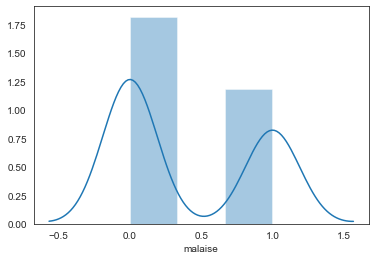

In [70]:
sns.distplot(data["malaise"], kde=True);

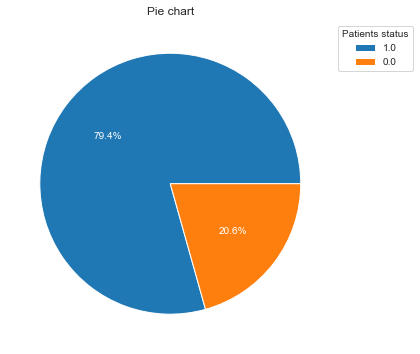

In [71]:
df = data["class"].value_counts().to_dict()
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()
ax.pie(df.values(), # pass the values from our dictionary
       labels = df.keys(), # pass the labels from our dictonary
       autopct = '%1.1f%%', # specify the format to be plotted
       textprops = {'fontsize': 10, 'color' : "white"} # change the font size and the color of the numbers inside the pie
      )
# set the title
ax.set_title("Pie chart")
#deDsY1WpfalOX3hSRg6j4RQ7fo8D/WJY1CMCyrPaWZZ1fz3OfA06zLOsCy7JSLMvqZFnW8HqeW1M2UAEUACmWZd0OtDvEazYDtmVZ+nsuIvvoHwSRwxQOh18F7gX+HllRvxSYWM9z1+ItErwB75DAIqAxC+/+g7cocBWwBijh0FP7L0d+3WZZ1ueNeA8R8QErHNZsoIiIiF9oxC8iIuIjKn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8REVv4iIiI+o+EVERHxExS8iIuIjKn4REREfSTEdQEREYtfChQu7pKSkPA4MRoPFeFAFLK2oqLhy5MiRW+p6gopfRETqlZKS8ni3bt0G5uTk7EhKStLFXWJcVVWVVVBQkL9p06bHgbPreo723kREpCGDc3Jydqv040NSUlI4JydnF94MTd3PiWIeERGJP0kq/fgS+f9Vb7+r+EVE5LCtW7cuZdKkSX169OgxZNCgQQOHDx+e98wzz3QAKCwsTDr77LP75Obm5vfv33/QyJEjB6xatSotLy8vPy8vL79z587DunTpMrT6v0tKSqz63ufBBx/sdOmll/ZqKMvrr7+ePWfOnMxDZX7uuefa33LLLd0Arr/++u63335718Z+3kmTJvXJzc3Nv/POO7s09jU11fd+oVAo9cwzz+wL3uc45ZRTjobGfe7G0jF+ERE5LFVVVUyaNOnoiy66aNusWbO+BVi1alXayy+/3AHgN7/5TZcuXbqU/+tf//oWYPHixek9e/YsX7FixTLwSjArK6vyrrvu2twSed55553srKysygkTJuxp6Hk/+clPdgG7mrr9tWvXpixcuDBrw4YNSxr7mvLyclJTUw/5PNu2y2fPnv3fpmZqCo34RUTksMyaNSs7NTU1fNNNNxVU/yw3N7fs1ltv3QKwcePG1KOOOqq8+rFhw4aVtm3bttGHDx544IFOtm0PPu644wYsWLAgq/rnGzZsSDnjjDP6DR48eODgwYMHvvnmm5krV65Me+aZZ3IeffTRrnl5efmzZ8/Oev7559sPHTo0b+DAgfljx47NXbduXQrUP4qeMWNGl379+g3Kzc3NP+uss/rWfvy0007L3b59e2r19hcsWNB22LBhebm5ufkTJkzoV1BQkAwwatSoAdOnTz/quOOOGzBjxoyDRvdffvllxujRo3N79+49+P777+8MsHLlyrT+/fsPauzvTXNoxC8iIodlyZIlbYcOHbq3vsd//vOfbz3rrLNyX3vttSNOOumk3VddddW2IUOGlDZm22vWrEkNBoPdFy5cuLxjx46VY8eOHTB48OC9AFOmTOl5/fXXbz7jjDOKVq9enXbGGWf0/+9///vVpZdeWlBzBqGgoCD5xz/+8YqkpCR+//vfd77rrru6PfbYY+vre88HH3yw25o1a5a0bds2vHXr1uTaj8+aNevrs846q3/1jEVubm7+H/7wh7WBQKDo2muv7X7zzTd3f/LJJ9cB7Ny5M/nTTz9dWdf7LF++vO3ChQuXFxYWJo8YMSJ/8uTJTZ59aA4Vv4iItKhLLrmk1yeffJKVmpoaXrp06fKxY8cWf/vtt0v++c9/tpszZ067sWPHDpw7d+6KY445puRQ23r//fczR48eXdi9e/cKgPPOO2/7qlWr2gDMnz+/3erVq9tWP7eoqCh5x44dB81kf/vtt2k/+MEPehQUFKSWlZUl9ezZs8GdjgEDBhSfe+65fc4+++ydP/nJT3Y29Nxt27YlFxYWJgcCgSKAq666atv555+/b5bgwgsv3F7faydOnLgzKysrnJWVVTFmzJjd8+bNyxw1alS9O1AtRVP9IiJyWIYMGVL85ZdfZlT/99/+9re177333qodO3bsG1y2b9++6rLLLtv57LPPrj333HO3v/baa+0bu33LqnutXzgc5rPPPlu+YsWKZStWrFi2ZcuWL4844oiq2s+bPn16r2nTpm1ZtWrVsj/96U9rSktLG+y+d999d/UvfvGLgoULF2YOGzYsv7y8vKGnNyg7O/ugPNVqf676PmdLU/GLiMhhmTRpUmFpaal177335lT/rKioaF+/vPnmm5nVx71LSkqsVatWtbFtu6wx2z7ppJP2fPTRR9mbNm1KLi0ttV599dUjqh8bN27c7nvvvXffqvoFCxa0BcjOzq4sLCzcN0VfWFiY3KtXr3KAp59+ulND71dZWck333yTNmnSpMJHHnlkfWFhYfKuXbsOmu6v1qlTp8p27dpVzp49OwvgiSee6DRmzJiixny2N954o8PevXutTZs2JX/00UfZ48aNa3AxYkvRVL+IiByWpKQkZs2a9c0vfvGLng8++GC3jh07VmRkZFTecccd6wFWrVrVZvr06b3BO7Pcaaedtuuyyy7b0Zht9+7du/zmm2/eMHr06IE5OTnlQ4cO3VtZWWkB/OUvf1l35ZVX9srNzc2vrKy0jj/++MKxY8eunTx58s4f/vCH/d54440Of/zjH9feeuutGy688MJ+Xbt2LTv22GP3rF27Nr2+96uoqLAuuuiiPoWFhcnhcNiaMmXK5s6dO1c2lPGpp576durUqb2vueaapF69epW+8MILocZ8thEjRuz53ve+13/Dhg1pN95440bbtstXrlyZ1pjXHg4rHNZ5GUREpG6LFy8ODRs2bKvpHNI0ixcv7jxs2DC7rsc01S8iIuIjKn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8REVv4iIxKyGLlrzox/9qPfChQvbABx11FFDNm7cmAKQkZExojnvNX78+KO3bt2avHXr1uRgMLjvZEQ1L497uBp7yeDGuOuuu7oUFhY2ucd1Ah8REWk023FHtuT2QsHAwua+9sUXX1zTklnmzp37NXg7G0888UQXx3EKDvWapmrsJYMbY+bMmV2vuuqq7Q2dFrguGvGLiEhMq6io4LzzzrNzc3PzzzzzzL7Vo9xRo0YNeP/99zMO9XqA2267reuMGTO6AFxxxRU9R48enQvw2muvZZ9zzjl9YP+swQ033NBj3bp16Xl5eflTpkzpAbBnz57kM888s2+fPn0GnX322X2qqryufe2117IHDhyYn5ubm3/++efbxcXFVs1tAbz//vsZo0aNGlDXJYNrZtywYUPK2LFj++fn5w+86KKLenfv3n3Ixo0bU3bv3p108sknHz1gwID8/v37D3rssceOmDFjRpctW7akjh8/Pvf444/Pbcrvp4pfRERiWigUanP11VcXrFq1all2dnbVb3/725xDv+pAp5xyStH8+fOzABYtWpSxZ8+e5NLSUuv999/PGjduXGHN595///3re/bsWbpixYplM2fOXA/eJXQffvjhdV9//fVXa9euTZ8zZ07W3r17rSlTpvR58cUXv1m1atWyiooKGso2YMCAsksvvbTg6quv3rxixYplZ5555gHn9Hccp/v48eMLly1btvy8887bsXHjxjSAV155pV23bt3KV65cuWz16tVfnXfeebtvu+22LV26dCmfO3fuqo8//nhVU34vVPwiIhLTunXrVnb66afvAbjkkku2LViwIOtQr6lt3Lhxe5csWZK5Y8eOpPT09PCxxx5bNG/evIwPP/ww+9RTTz3kRXWGDBmyp1+/fuXJyckMGjRo7zfffJO2ePHiNj169CgdOnRoKcDll1++7YMPPshu+if0fPLJJ1mXXXbZdoAf/vCHu9u1a1cJcMwxxxTPmzev3dSpU4+aPXt2VqdOnRq8dsChqPhFRCSmtcTla9PT08M9evQoffjhhzuPGjWq6KSTTip66623stesWZM+YsSIksa8vvp+cnIyFRUVDV7rJjk5OVx9OKC4uLhRXVvf9oYOHVr6+eefLxsyZEjxrbfeetSNN954ZGO2Vx8Vv4iIxLSNGzemvfXWW5kAzz//fMexY8c26rK3tY0dO7bo4Ycf7nryyScXnnbaaYV//etfc/Lz8/cmJR1Yhe3bt6/cs2fPIftx+PDhJd99913a0qVL0wGeeeaZTieeeGIhQI8ePcrmz5+fAfDSSy/tu5Rw7UsG1zRq1Kiiv/3tbx3Bm97fvXt3MkAoFErNzs6umjZt2vZrr71286JFizIAMjMzK3ft2tXkHlfxi4hITOvbt2/Jk08+2Sk3Nzd/x44dKTfeeGOzVtuPHz++sKCgIPXUU0/d07Nnz4r09PTwCSeccNBORLdu3SpHjhxZ1L9//0HVi/vqkpGREX700UdD559/fr/c3Nz8pKQkqrPdfvvtG2666aZeI0eOHJCcnLxvKD958uSdrut2qGtxXzAY3PDOO++0y8/PH+i6bvucnJzyDh06VC5cuLDt8OHDB+bl5eXfe++9R95+++0bAS677LKtEydO7N/UxX26LK9IC7IdtwPQFegS+bXm/RwgHW+H24r8Wn2/CigDSiO36vt7gY3A+sjtO2B9KBgojdqHEl/TZXmjp7i42EpJSQmnpqby1ltvZU6fPr33ihUrljVnWw1dllff4xdpAttxewDDgWHA0dRd7NHIsY1aOwM1fl0ZCgZa9PvNItL6vv7667QLLrigX1VVFampqeGZM2eGWuN9VPwidbAdNxnIA0bgFX112Xc2mauGTpHbsLoetB23APi05i0UDGyJXjwRaaohQ4aULl++vFkj/KZQ8YvvRUr+2MituuQHA21M5jpMOcD3IzcAbMddy/4dgU+AhaFgYLeZeCJiiopffMl23E7AmUAAOAPoaDZRVPSK3CZH/jtsO+5K4CPgdWB2KBg47NOIikhsU/GLb9iOOwKv6L8PHI++1WLhHc7IAy4HSmzHfQt4DfiXDg2IJCYVvyQs23GzgAl4ZT8R6G42UcxrA5wVuc20HfdDvJ2AV0PBwNdGk4lIi/H7iEcSjO24mbbjXm477hxgG/AKcAUq/aZKAk4A7gNW2477le24d9uOO8p23KafNk2kmRLtsrzVar9HNGnELwnBdtwTgJ8BFwBNPo+3HFJ+5HYLsN523KeBx0LBwFqjqST67mjfopfl5Y5dvrosb7Vt27Ylt/Z71EcjfolbtuPm2I57c2SB2gd4xa/Sb309gNuAb23Hfd123EmRb0aItIpYvixvTXPnzs3Izc3NHz58eN6UKVN6VM9UfPbZZ22GDBkyMC8vLz83Nzd/yZIl6XW9R7So+CXu2I472nbcvwHrgCDQpNNVSotJwls/8S+8nYBf247bxXAmSUCxelne2u9x5ZVX9nn44YfXLFq0aEXN0/Q+9NBDOdOmTdu8YsWKZV9++eXyPn36lNX1HtGi4pe4YDtuG9txf2o77mfAh8DFROksedIoPYG7gLW24z5hO+5g04EkccTqZXlrPr5169bkPXv2JE2YMGEPQPXldQHGjBmz5/777z/y1ltv7bZ69eq0rKwso+fK1zF+iWm247YBpgEO3klpJLal4x1y+VlkgeUf8M4PoIuCSLO1xmV5hw0bVny4l+Wt+XhD1725+uqrt5944ol7Xn311fYTJ07MfeSRR0IDBgwwdr0NjfglJtmOm2o77lTgG+B+VPrxaALwb2Cx7bgB02EkfsXqZXlrysnJqczMzKx6++23MwGqL68LsGzZsrSBAweW3nbbbVtOP/30nYsWLWrbnPdoKSp+iSm24ybbjns5sBJ4BH0NLxEMAV63Hfdd23FHmQ4j8SdWL8tb28yZM0NTp07tPXz48LxwOEx2dnYleDsBubm5g/Ly8vJXr17dZsqUKdua+x4tQZfllZgQ+W74+cCdeGeSk8T1MnCLTgoUH3RZ3sbbtWtXUvv27asAbrnllm4bN25Mfeqpp9aZyNLQZXk14hfjbMc9C/gceBGVvh+cDyyzHfdP+haAJJKXXnqpfV5eXn7//v0HLViwIOvuu+/eaDpTXTTiF2Nsxz0VuBsYbTqLGFMI/A64XxcIik0a8cenhkb8WtUvURcZ5T2Ed5Y98bdsvMM7U23HvRN4PBQMVBjOJJLQNNUvUWU77iXAMlT6cqBuwJ+BL23HPd50GDlAVVVVla7PEEci/78OPrVghEb8EhW24/YEHsW7JK5IfQYC823HvQ+4IxQMlJkOJCwtKCjIz8nJ2ZWUlKRjwzGuqqrKKigoaA8sre85OsYvrSqyWn8q3ql1sw3HkfiyBLgsFAx8YTqIny1cuLBLSkrK48BgNEscD6qApRUVFVeOHDlyS11PUPFLq7Edtz/wOHCS6SwSt8qBGcBvdOxfpGWo+KXFRa7UdiNwB9DGbBpJEAvxRv9fmQ4iEu9U/NKibMcdCjwJtOw1u0WgFPhf4LehYKDehUsi0jAVv7QY23EvBWaiUb60rg/xRv+rTQcRiUcqfjlstuOmAL8Hfmk6i/hGMTAtFAw8bTqISLxR8cthiZyM52W0gE/MuB+4SVP/Io2n4pdmsx33OOAVIKpXlhKp5d/AhaFgYLfpICLxQN/JlGaxHfenwDxU+mLe94EPbcftazqISDzQiF+axHbcVOCPwDTTWURq2Qb8MBQMvGc6iEgsU/FLo9mO2xX4BzDOdBaRepQD00PBwF9MBxGJVSp+aZTI8fxXgaNMZxFphIeA60LBQKXpICKxRsUvh2Q77gS80s80nUWkCeYAF4SCgZ2mg4jEEhW/NMh23HOBF4B001lEmmEVcHooGFhjOohIrNCqfqlX5Ex8L6PSl/iVC8zVin+R/VT8UifbcacDTwPJhqOIHK7eeOXf33QQkVig4peD2I77K7zFUZbpLCItpAfwnu24eaaDiJim4pcD2I57I3Cf6RwiraA7XvkPMh1ExCQt7pN9bMe9Hu/c5yKJbAtwUigYWGk6iIgJGvELALbjXodKX/yhC/C2FvyJX2nEL9iOew3wgOkcIlEWAk4MBQPrTQcRiSYVv8/Zjnse3ml4tZBP/GgV3rT/ZtNBRKJFxe9jtuOOBN4HMkxnETFoKTAuFAzsMh1EJBp0jN+nbMc9CvgXKn2RwcBztuPq30PxBf1B9yHbcTOBWXhfbxIRCAB3mw4hEg2a6veZyKjmFeAc01lEYtCFoWDg76ZDiLQmjfj9J4hKX6Q+T9qOe4zpECKtSSN+H7Ed9wrgcdM5RGLcOuDYUDCwxXQQkdag4vcJ23FPBt4EUg1HEYkHHwCnhoKBctNBRFqapvp9wHbcXOD/odIXaaxxwJ9MhxBpDRrxJ7jICv7P8a5LLiJNMy0UDPzZdAiRlqQRf+L7PSp9keZ6wHbck0yHEGlJGvEnMNtxvw+4pnOIxLkCYGgoGNhkOohIS9CIP0HZjtsJeMJ0DpEEkANoul8Shoo/cT0KdDMdQiRB/MB23AtNhxBpCZrqT0C2414M/M10DpEEsw3I1/f7Jd5pxJ9gbMftgb6GJNIaOgGPmA4hcrhU/AnEdlwLeBpobziKSKKabDvuBaZDiBwOFX9i+SXwPdMhRBLcn2zHzTEdQqS5VPwJwnbcPLwL8IhI68pBh9Mkjqn4E4DtuCl4i/nams4i4hMX2I472XQIkeZQ8SeGKcCxpkOI+MwjkfNliMQVFX+csx23HfC/pnOI+FAX4CHTIUSaSsUf//4H75ijiETfhbbjjjcdQqQpVPxxzHbcXsC1pnOI+Nw9pgOINIWKP779BmhjOoSIz42xHfds0yFEGkun7I1TtuOOBD4FLNNZRISlwLBQMFBlOojIoWjEH79+h0pfJFYMBi42HUKkMTTij0ORacXXTOcQkQOEgAGhYKDMdBCRhmjEH2ciJ+u5z3QOETmIDVxtOoTIoaj4488UYIDpECJSp1ttx80yHUKkISr+OKKT9YjEvC7A9aZDiDRExR9fpqOT9YjEuhtsx+1sOoRIfVT8ccJ23DS8y+6KSGxrB9xiOoRIfVT88eNioJvpECLSKNNsx+1iOoRIXVT8ccB2XAu4wXQOEWm0dLyFuCIxR8UfHyYC+aZDiEiTXG07bqrpECK1qfjjw42mA4hIk3UHfmg6hEhtKv4YZzvuYOAU0zlEpFmuMR1ApDYVf+ybZjqAiDTbaNtxR5kOIVKTij+G2Y6bjS78IRLvtPMuMUXFH9suAbJNhxCRw3K+7bjtTYcQqabij21TTQcQkcOWAVxkOoRINRV/jLIddxzeNb5FJP5daTqASDUVf+y60HQAEWkxx9iOe4zpECKg4o9JkTP1/cB0DhFpURr1S0xQ8cemMXgn/xCRxHGB7bjJpkOIqPhj03mmA4hIi+uEt1MvYpSKPzap+EUS0yTTAURU/DHGdtwRQB/TOUSkVZxtOoCIij/2TDYdQERaTZ7tuEebDiH+puKPPZrmF0lsmu4Xo1T8McR23IHAQNM5RKRVqfjFKBV/bNFoXyTxnWg7bgfTIcS/VPyxRcf3RRJfCnCm6RDiXyr+GGE7rg2MMJ1DRKJCq/vFGBV/7DjZdAARiZqJtuOmmA4h/qTijx2jTQcQkajpAIwzHUL8ScUfO1T8Iv4ywXQA8ScVfwywHTcTGGw6h4hE1UjTAcSfVPyx4VhAV+0S8ZdjTAcQf1Lxx4bjTQcQkajLsR23p+kQ4j8q/tig4/si/qTpfok6FX9sUPGL+JOm+yXqVPyGRab6jjSdQ0SM0Ihfok7Fb55G+yL+pRG/RJ2K3zwVv4h/dbMdt7vpEOIvKn7ztKJfxN803S9RpeI3b5jpACJilKb7JapU/AbZjtsJyDKdQ0SM0ohfokrFb1Yv0wFExDhdjluiSsVvlopfRI7SJXolmlT8Zqn4RcQCupoOIf6h4jdLxS8ioJN4SRSp+M1S8YsIqPglilT8Zqn4RQRU/BJFKn6zVPwiAip+iSIVvyG246YC3UznEJGYoOKXqFHxm9MD/f6LiEfFL1Gj4jFH0/wiUk3FL1Gj4jenp+kAIhIzVPwSNSp+czqaDiAiMaOr7biW6RDiDyp+c9qaDiAiMSMV6Gw6hPjDoYrfBpbW89jjQH7kfoj9f2iLmpnl30CHyG1ajZ+fDLzezG3WdjIwtoW2dS2QcRivV/GLSE05pgOIPxzOhSGubLEUnu9HfrXxiv+RFt4+eMVfBCxogW1dCzwL7G3m62Oy+H96gs2Pj+uFZcHfP1nLk/NDDDwym7t/MISM9GTW7yjm2r8voqi0os7XJ1kw65fj2LSrhCv++hkAf/zRcAZ0y+adFVv47X9WAvDLU49mxaZC5izbHLXPJhLjUk0HEH9ozFR/CvBX4EvgH+wf5b4HHNvI97kJuCZy/w/AO5H738MrT9g/axAE+gGLgN9GHsuKvPcK4Dm8i1pUv/4LYAnwJJBea1tEMr6Ht0NxNXBdZNsn1sqYA8wBPgdmAmsi28gEXGAx3uzHjyKfpTvwbuTWHDFX/Llds/jxcb045+EPmPjAPE7N64rdKYPgeUO5d/YKzvzjPP7z1SZ+flLferfx0xP68PWW/ZM+ed2yAZj4wDyOszuSnZ5CTnY6w3p2UOmLHEjFL1HRmOIfAPwFGArs5sBp+MZ6n/1FeyxekacC44B5tZ7rAN8Aw4FfRX42Am+EnQ/0BU4A2gBP4xXxELwdlKkNZAgBj+LteAyv433/F2+H5BjgVfZ/3e5MYAMwDBgMzAYejPzslMitOWKu+I/uksUX63ZQUl5FZVWYj7/dxhmDutE3J5OPv90OwAertzJxcN3nHerWrg2n5nXh75+u2/ez8sowbVKTsSxIS7aoDIe5fkIuf5izKiqfSSSO6NK8EhWNKf51wPzI/WfxyrqpFgIjgWygFPgQbwfgRA4u4Lp8AqwHqvBG6zbeDsm3QHWD/BU4qRnZqo0D/h65PxvYEbm/BDgNuDeSd9dhvEdN6Yd+SnSt3FTEKLsjHTJSaZOaxCkDunBkh7as2lzEhHzvqqHfH3IkR3aoe5/l9kn53PPGcsLh8L6ffVNQxIadxbi/HMfrSzZid8rEsuCrDbuj8pkkvozPzeHtG8bz3o0nM3V8vzqfExhyJHOuO4k3rzuJB348HIC+nTOZNX0cb/yfEzmmVwcAkpMsnr3ieNqkxs0aZhW/REVj/qCFD/HfjVGON+L+Kd7x9S/xRsr9gOWNeH1pjfuVeLkb+upLBft3ato0MmN920lJ3JoAABRZSURBVFuFt9PyfeAe4E3grkZusznvZ8w3BUU8Ove/PHvF8ewpq2D5xt1UVlVx0z8W87+TBnHNqf15a/lmyiuqDnrtqXld2FZUxtLvdjO674HfVLzr9WX77j9+2bHc8soSfnHK0Qw8MpsPVm89YIZA/CvJgrvOGcTFT3zMpl0l/Gv6OOYs33zAoSO7UwbTTunH5EcXsLu4gk6ZaQBcdHwv7p29gvU79nLzxDymPvs5F4/uzatfrKek/OA/rzGqOcVv4y1+HlzHY48DvweW4f37eyywFW+dU1Yz3uvfwEWR+xexfx3WycCNwFnN2GZ9OtR6D2lBjfmD1gsYgzdKvxD4oJnv9T7eH46f4Y2if483E1B7R6IQb2bgUFbg/aE/GvgauASYG3kshFfWbwCTa227XT3b+wC4AG9kfzpwROTn3YHteLMdRcDltXJubUTWusRc8QO89Nk6XvrMK+JfnTGAjbtK+KZgD5c++QkAfTpnckpel4Ned2zvIzgtvwun5J1CekoSWemp/OFHw7nuxUX7njMhvytL1u8iIy2ZAV2zmP78F7w4ZTT/XPRdPP3j3OJSqShvS0lxBmXFGVZJaRbFpRlWSVkWxRVtKSu3CMfkn5WWltuvX2ZFYUH3ETvfWg2wfmVGt5uPgVlvzt9U/ZwLTjqnx6ovPig5uXT+VpKAYiAJ8tI6H5WaHSraVr69rFfKkUdemPXFmsuGDe77x5kzV58dJwP+PbQNQ6AlNxmPC7CrVX+7S8XfChpT/MuBy/AWvK0G/tzM95oH3Iq3A7EHKKHuaf5teIcWluIVt1vP9krwZhBexvscn+Idwwe4E3gCuAX4uMZrZuEtEjwH+GWt978TeAFvzcBcYCNeuZ+Mt8iwCm/monodwV8i+TbS/OP8MadTZhrb9pTRvX0bzhzUjXP/PH/fzywLpp96NM99vOag1933n5XcF1mxP7pvR646se8BpZ+SZPHTE2x+9vSn9OmcuW9vL8mySEtO8nXxl5OSWk5W6m5ot+83JvKrRVVVW8qK21JakmmVlGRSUppJSWmmVVyRTXF5llVcnkVxZba1tyqLksosismyismgJJxplSRlUJrUhrKkNlZZSjrlKalUpKRSkZZCZVoyVWlJhNtYhNsCbS3L8Hk9ss+B7ak8mPbwSAC2b4UexzIh7eGj9j2n/Vio+IZzrz67N0nJ8N498PXbsOA1xp37KCT3gdd/xj3fu+gI3pnKg2nzR5r6OM2QCr9uzuuqF2CPwJuhvBTv20bv4Q22PmvENm7C+zf1Qbx1UMOAU/EWUP8UuJj9swY1F2DPwfs3unoB9mC8Ad3FHDyoOw7v3+U9eAOtiZHnDwKeAtLwZmonA/+31nv8Cmkxhyr+EPu/q1/byTXu2zXu1zeF9DYHrlrNrfV4zW1cVOux92rcn15rmyPqeK95dWwfvL8UQ+vJtws4A+8wwRi8Mi8F/hO51fZQ5NZcMTmK+/PFIzkiI5WKqjC/fm0pu4sr+OkJNpeM7g3Af77axMufrQegS3Y6904eyk+f/vSQ2710TG/+30Jv2nX5xkIsYPa1J/LeigJ2l9T91UCBMElJe2mTuZc2mdvC7Ws+0OLSKC9rS2lxJiXFba3S0ixKyrKs4rJMisuyKK7ItoorsyiuyLKKw9nsrcq0SsJZlFiZFNPWKrXaUpbcltLkdKs8OY2K1FQqUr0djMr0ZKrSkwi3wdvBSKs7QR1/JcK1PmhSCnTsC08HoN1R8LM34JExsGs9PB2Zae7YF7KPhK2r4NyZkJwG786Abd+06O9XK2ju3u8A4Aq8AdOTeCPl3zVxG+8DN+AV/7F4a5AaWoA9GG+RNHhdMAKvwDdEcpzAwbPDTwE/xzvcG6zx86uBB/C+sZUGJNfxHtKCtJhkv17AS3h7nGXAVWbjmHHBzA8P+tlT80M8NT900M+3FJbWWfof/Xc7H/13+wE/e7LW66/5+yIktpSRmlZGatoustrXnnloSUlUVbaltLgtpcWZVklZJiUlmZSUHbe7a+rkjuO6PF5+xfJsiivPyJnUPa2sMry8YvzaLKuYTErCg0uTB5St/7Jwb0XO1vQde1K67to8sLTLMZusNQsqUyI7GMmn3dmZt+6s5Pir21pLXoKda2G8A6/E/F/p8ma+rvYC7GtoevHXXoD9OfsXYF/TwOuqVS/Ahv0LsGsWf4fItqvPofI8+9cEfIg3G9wDeAVvZllakYp/v9XUPXvQWlrhn1SR2FdFUvIe2mbtoW3W1hp/Cz7/r8WPs7swr91Zx2/eXcK5R4/jmhe+YHXFlD7Vzxn/aXvOHnbRkTeUDco9IiMVN3sg318/LXtnqVfqx/fpyIRtXZmx4S5+fcxAFpSNKdtasrPkptSh6XeU3rcxc/8sRnm2VVyRRXGFd6ikOJzF3qosqyScSYmVSYnlzWKUJrWhLDndKk9Jozw1bd8sRlVaElVtasxitMR38Mua+bpYXYBdU0MznM/jHZIN4M2uXgn8tzGhpXlU/Oa01NcCRRJCZVWY2/+1lGd+NorkJIuXPlvP6i1FXDchlyXrd/LW8i3MXVXAif07M+e6k6gMh7nn38vZuXf/QHn6qUfzi+c/B+D5j9fxwI+HpyUnWWm3/XMpq8M9bKBVdrmTqaxoS2lxBqUlGVZkHQYlpVnezkV5llVcnk1xVba1tzKTkqrqtRiZlJAR2cHYFO6453vNe/tYXYBd047I60YDHwE/rvFYX7yifzByfyjeCdOa+h7SSCp+c5r7bQCRhPXeygLeWzn3gJ/VPtnTDHc5M9y6B6GXPPHJvvvfFBRx1kPN7cCmqSQ5pYiM7CIysg+oyabtZOwNNe/tY3UBdm1XAI9Ftv0e+wc/P8JbDFgObML7uvT2Wu+hxX0tyArXXjwjUWE77nQOb3GgiCSWnFAwkMgDgiz2X8TNAY4E/o+5OP6lEb85ifwXXESaLtFPZxkA/gevd9aw/5woEmUqfnNU/CJSrTQUDDR3cV+8eDFyE8Pi5JxWCUnFLyLVEn20LzFExW9OgekAIhIzCk0HEP9Q8ZujEb+IVNtoOoD4h4rfkFAwUMr+Fa4i4m86YY1EjYrfLI36RQQg5i8kIIlDxW+WjvOLCKj4JYpU/GZpxC8ioOKXKFLxm/Wd6QAiEhNU/BI1Kn6zvjIdQESMKwoFA1tMhxD/UPGb9aXpACJinEb7ElUqfrNU/CKi4peoUvEbFLkS1ybTOUTEKBW/RJWK3zyN+kX8TcUvUaXiN2+J6QAiYpTO2idRpeI3TyN+EX9bbTqA+IuK3zyN+EX8a3MoGAiZDiH+ouI3bxlQYTqEiBjxgekA4j8qfsMiV+nTVJ+IP80zHUD8R8UfG3ScX8SfVPwSdSr+2KDiF/GfQmCx6RDiPyr+2PC+6QAiEnUfhoKBStMhxH9U/LHhQ2Cn6RAiElWa5hcjVPwxILLX/7bpHCISVSp+MULFHztmmw4gIlFTBnxiOoT4k4o/dqj4RfxjYSgYKDYdQvxJxR8jQsHAeuAr0zlEJCo0zS/GqPhji0b9Iv6gM/aJMSr+2KLiF0l8xcC7pkOIf6n4Y8s8YK/pECLSqtxQMFBkOoT4l4o/hkTO2/+e6Rwi0qr+bjqA+JuKP/Zoul8kcRUCrukQ4m8q/tij4hdJXK+FgoES0yHE31T8MSYUDKwGlprOISKtQtP8YpyKPzb91XQAEWlx24E3TYcQUfHHpmcBXbVLJLG8EgoGyk2HEFHxx6BQMLAJjQxEEo2m+SUmqPhjl6b7RRLHZvRVXYkRKv7Y9Rqwy3QIEWkR/4hcflvEOBV/jIp85ec50zlEpEVoml9ihoo/tj1qOoCIHLYVwHzTIUSqqfhjWCgYWIL+wRCJdw+GgoGw6RAi1VT8sU+jfpH4tQN4xnQIkZpU/LHvZWCr6RAi0iyPh4KBPaZDiNSk4o9xkSv2PWU6h4g0WSXwJ9MhRGpT8ceHB4FS0yFEpEleDQUDa02HEKlNxR8HQsHAeuAx0zlEpEnuMx1ApC4q/vjxG0CX8xSJD2+FgoFPTYcQqYuKP06EgoGNwEzTOUSkUX5jOoBIfVT88eUeYK/pECLSoA9DwcC7pkOI1EfFH0dCwcBm4M+mc4hIg+4xHUCkISr++HMvoO8Fi8SmxcDrpkOINETFH2dCwUAB8LDpHCJSp+t1el6JdSr++HQfUGg6hIgc4JVQMPCO6RAih6Lij0OhYGAb8JDpHCKyTwlwo+kQIo2h4o9fvwN2mw4hIgDcHwoGvjUdQqQxVPxxKhQM7MBb6CciZn2HVvJLHFHxx7ffAktNhxDxuZt1BT6JJ1Y4rAWo8cx23NHAfLQTJ2LCglAwcILpECJNobKIc6Fg4CPgEdM5RHwoDFxjOoRIU6n4E8MtwHrTIUR85qlQMLDQdAiRplLxJ4BQMFAITDOdQ8RHduPtcIvEHRV/gggFA7OAl03nEPGJOyPXzhCJOyr+xHINsNN0CJEE9y7wR9MhRJpLxZ9AQsHAJuBXpnOIJLDtwCWhYKDKdBCR5lLxJ54ngLmmQ4gkqCtDwcB3pkOIHA4Vf4KJXBns53jnDheRlvOXUDDwqukQIodLxZ+AQsHAKuAG0zlEEshy4DrTIURags7cl8Bsx30GuMR0DpE4VwqMDgUDi0wHEWkJGvEntinAYtMhROLc/6j0JZGo+BNYKBgoBiajr/iJNNds9NU9STCa6vcB23EDwCzAMp1FJI5sAYbqRD2SaDTi94FQMOACM0znEIkjYeBylb4kIhW/f9yBN20pIof261Aw8IbpECKtQVP9PmI7bkdgIWAbjiISyx4LBQM/Nx1CpLVoxO8joWBgO3AeOrmPSH3+DUw1HUKkNan4fSYUDHyB/mETqctC4IJQMFBpOohIa1Lx+1AoGHgauM90DpEYEgICoWBgj+kgIq1Nx/h9zHbcx4ArTecQMWw7cEIoGFhhOohINGjE729XA6+YDiFiUClwjkpf/ETF72ORY5kXAW+bziJiQBi4NBQMfGA6iEg0qfh9LhQMlAI/AD4xnUUkym4KBQMvmQ4hEm0qfiEUDBQBZwKfm84iEiV/DAUDvzMdQsQEFb8AEAoGdgAT0NX8JPH9LhQMXGc6hIgpKn7ZJ3KCn9OAJaaziLSSGaFg4FemQ4iYpK/zyUFsx80B3gUGmc4i0oJuCwUDd5sOIWKaRvxykFAwUAB8D+9MZiKJ4EaVvohHxS91ilyOdDzwL9NZRA5DJXBlKBi433QQkVih4pd6RU5fei7woOksIs1QDJwXCgaeMB1EJJboGL80iu241wB/QDuLEh92AGfr5DwiB1PxS6PZjjsJeAHINJ1FpAHfAWeEgoGvTAcRiUUavUmjhYKBWcBJwEbTWUTq8SkwRqUvUj8VvzRJKBj4HDgefddfYs8jwLhQMLDOdBCRWKapfmkW23HbAS8Dp5vOIr63B7gqFAy8YDqISDzQiF+aJRQM7AYCeKMsEVOWA6NU+iKNpxG/HDbbcc8BHgc6m84ivvJ3vJF+kekgIvFExS8twnbcbsCTwETTWSThlQHXh4KBh00HEYlHKn5pUbbjTgfuA9qaziIJaS1wfigY+MR0EJF4peKXFmc7bj7wLDDCdBZJKG8AF0euIikizaTFfdLiQsHAMmA03si/ynAciX87gJ8DAZW+yOHTiF9ale24JwPPAD0NR5H49Bze8fwtpoOIJAoVv7Q623E74H3t70LTWSRufA1MDQUDb5kOIpJoVPwSNbbjng78HhhkOovErDK8Q0R3h4KBEtNhRBKRil+iynbcZLzjtXeh7/3Lgd4Hrg4FA8tNBxFJZCp+McJ23PbAbcA1QJrhOGLWNuAm4KlQMKB/kERamYpfjLIdtx/wW+Bc01kk6qrwFn7+KhQMbDUdRsQvVPwSEyKr/3+PvvvvB5XAC8CMUDCw0nQYEb9R8UvMsB03CbgcuBvoZjaNtIJKvBM73R0KBlabDiPiVyp+iTm242YBvwCuRTsAiaAC+Bte4X9jOoyI36n4JWbZjpsOXAr8CuhvOI40XTnwV+A3oWDgW9NhRMSj4peYFzkEcC7eyu9RhuPIoZUBTwH3hIKBNabDiMiBVPwSV2zHHQP8EvghkGo4jhyoAG+E/2AoGFhnOoyI1E3FL3HJdtwjgSmRm9YBmBMG3gX+ArwaCgbKDOcRkUNQ8Utcsx03FZgMXAScDqSbTeQbG/EW7D0WCga+Nh1GRBpPxS8Jw3bcdsA5wPloJ6A1FAGv4n0l7+1QMFBpOI+INIOKXxJSZCfgbLydgDPQTkBzlQNv4ZX9P0PBwF7DeUTkMKn4JeFFdgImARegnYDGWA7MAd4E5oaCgSLDeUSkBan4xVciOwFnAacAY4GBgGU0lHkFeKP6OcCcUDCw3nAeEWlFKn7xNdtxjwDG4O0EjMU7T0Cm0VCtrwT4gP2j+sW6Kp6If6j4RWqwHTcZGIa3E3BC5NdeRkMdnm3AVzVuS4FPQsFAsdFUImKMil/kEGzHPQoYDthAn1q/djSVq5adHFjwXwFLQ8HAZqOpRCTmqPhFDkNkzYDNwTsENnAE3mGDLJq+oLAKr8x3ANtr3HbUuv8d8FUoGNhwOJ9DRPxDxS8SBZFDCFl4OwJtgOQ6bgC78Ap9p467i0hrUPGLiIj4SJLpACIiIhI9Kn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8REVv4iIiI+o+EVERHxExS8iIuIjKn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8REVv4iIiI+o+EVERHxExS8iIuIjKn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8REVv4iIiI+o+EVERHxExS8iIuIjKn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8REVv4iIiI+o+EVERHxExS8iIuIjKn4REREfUfGLiIj4iIpfRETER1T8IiIiPqLiFxER8ZH/DyFaKRxbfVcVAAAAAElFTkSuQmC
ax.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 10, title = "Patients status");